In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/archive/BHIST_1920-2100/b.e13.BHISTC5.ne120_t12.cesm-ihesp-hires1.0.30-1920-2100.002/tseries/ice/to_archive/b.e13.BHISTC5.ne120_t12.cesm-ihesp-hires1.0.30-1920-2100.002.cice.h.aice.192001-200512.nc')

In [3]:
plotvar = data.variables['aice'][8:1032:12,:,:]

In [6]:
lont = data.variables['TLON'][:,:]
latt = data.variables['TLAT'][:,:]

In [8]:
lont.shape

(2400, 3600)

In [9]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
#nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
nice_levels = [0,10,20,30,40,50,60,70,80,90,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#################################################################

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


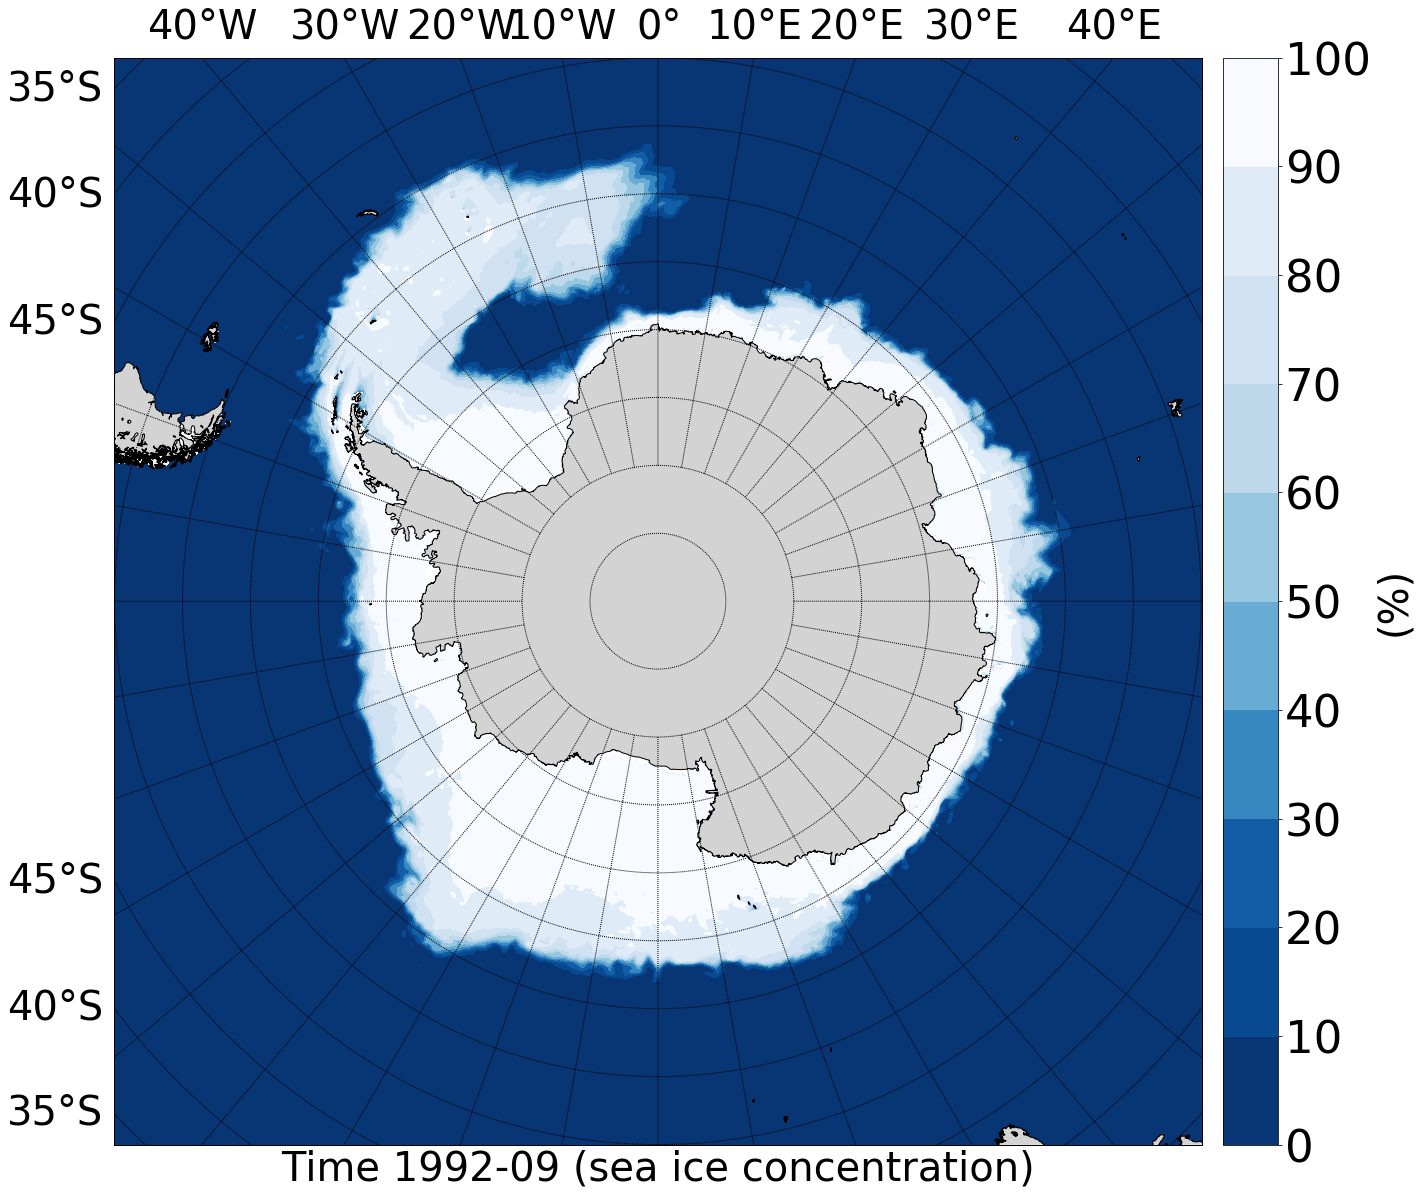

In [16]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar[72],range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("Time 1992-09 (sea ice concentration)",**my_font)
plt.savefig("ensembele new.png",bbox_inches='tight')